In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def grad(fun, fit, delta):
    ndim = len(fit)
    matr = np.zeros((ndim, ndim))
    for i in range(ndim):
        matr[i, i] = delta

    fr = np.array([fun(fit + matr[:,i]) for i in range(ndim)])
    fl = np.array([fun(fit - matr[:,i]) for i in range(ndim)])

    g = 0.5*(fr - fl)/delta
    modg = np.sqrt(np.sum(list(map(lambda x: x*x, g))))
    g /= modg
    return g


In [11]:
def ofGradient(fun, ndim = 2, eps = 1e-4, st = 0.9, fit = np.array([9.9, 9.9]), low = [-1, -1], up = [10, 10]):
    k = 0
    x = [fit[0]]
    y = [fit[1]]
    while st > eps:
        g = grad(fun, fit, 0.01)
        fung = fun(fit)
        fit -= st*g
        if fun(fit) >= fung:
            st *= 0.5
            fit += st*g
        k += 1
        x.append(fit[0])
        y.append(fit[1])
    print("Iterations: {}".format(k))
    print("Minimum value = {0:.4f}".format(fun(fit)))
    return x, y

### Простой пример с одним минимумом:

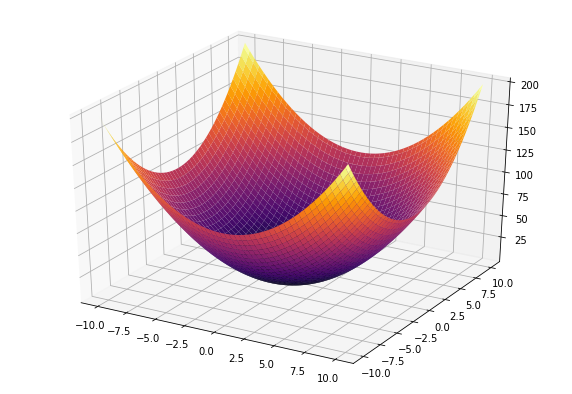

In [12]:
def J1(x):
    ndim = x.shape[0]
    return (x[0]**2 + x[1]**2)

size = 10
X = np.linspace(-size, size, 100)
Y = np.linspace(-size, size, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')


In [13]:
x_point, y_point = ofGradient(J1)

Iterations: 37
Minimum value = 0.0000


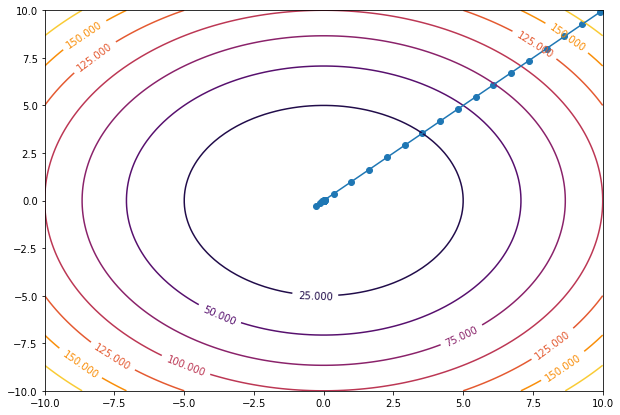

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(x_point, y_point)
plt.plot(x_point, y_point)
con = plt.contour(X, Y, Z, cmap='inferno')
plt.clabel(con)
axes = plt.gca()
axes.set_xlim([-size, size])
axes.set_ylim([-size, size])
plt.show()

### Пример с несколькими локальными минимумами: 

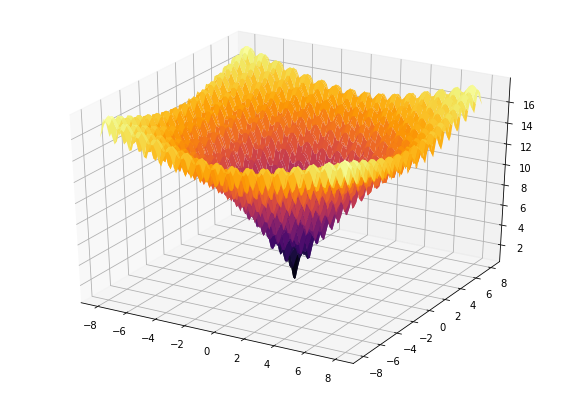

In [15]:
def J2(x):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x[0]**2 + x[1]**2))) - np.exp(0.5*(np.cos(2*x[0]*np.pi) + np.cos(2*x[1]*np.pi))) + np.e + 20

def J2_graph(x, y):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x**2 + y**2))) - np.exp(0.5*(np.cos(2*x*np.pi) + np.cos(2*y*np.pi))) + np.e + 20

size = 8
X = np.linspace(-size, size, 100)
Y = np.linspace(-size, size, 100)
X, Y = np.meshgrid(X, Y)
Z = J2_graph(X, Y)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')

In [17]:
x_point, y_point = ofGradient(J2, fit = [4.3, 4.9], st = 0.1, low = [3, 4.5], up = [4.5, 5.4])

Iterations: 19
Minimum value = 11.9013


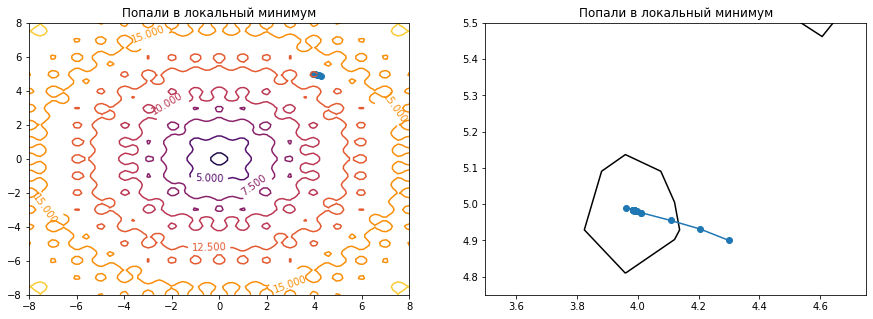

In [18]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_point, y_point)
plt.plot(x_point, y_point)
con = plt.contour(X, Y, Z, cmap='inferno')
plt.clabel(con)
axes = plt.gca()
axes.set_xlim([-size, size])
axes.set_ylim([-size, size])
plt.title('Попали в локальный минимум')

plt.subplot(1, 2, 2)
plt.scatter(x_point, y_point)
plt.plot(x_point, y_point)
con = plt.contour(X, Y, Z, colors='k')
plt.clabel(con)
axes = plt.gca()
axes.set_xlim([3.5, 4.75])
axes.set_ylim([4.75, 5.5])
plt.title('Попали в локальный минимум')
plt.show()

In [19]:
x_point, y_point = ofGradient(J2, fit = [4.3, 4.9], st = 8.9, low = [-5.2, -2.2], up = [8.1, 7.1] )

Iterations: 27
Minimum value = 0.0001


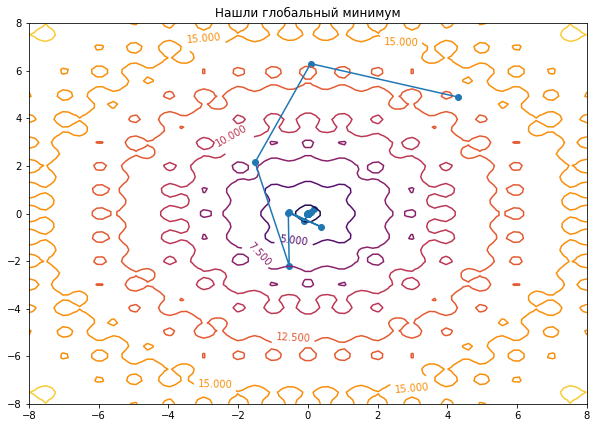

In [21]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(x_point, y_point)
plt.plot(x_point, y_point)
con = plt.contour(X, Y, Z, cmap='inferno')
plt.clabel(con)
axes = plt.gca()
axes.set_xlim([-size, size])
axes.set_ylim([-size, size])
plt.title('Нашли глобальный минимум')
plt.show()

### Пример с оврагами:

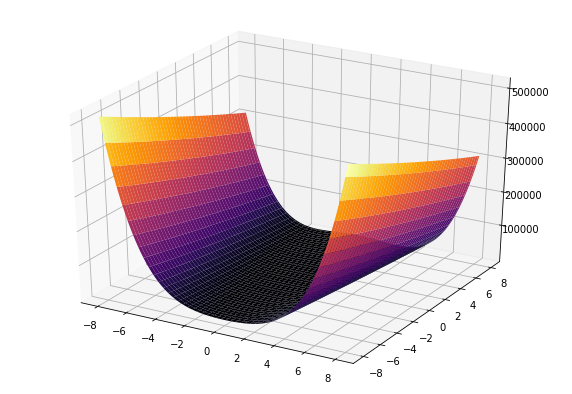

In [22]:
def J3(x):
    return 100*(x[1]-x[0]*x[0])**2 + (x[0]-1)**2

def J3_graph(x, y):
    return 100*(y-x*x)**2 + (x-1)**2

size = 8
X = np.linspace(-size, size, 100)
Y = np.linspace(-size, size, 100)
X, Y = np.meshgrid(X, Y)
Z = J3_graph(X, Y)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')

In [23]:
x_point, y_point = ofGradient(J3, fit = [2.3, 2.2], st = 9.9, low = [-5.2, -5.2], up = [8.1, 7.1])

Iterations: 17393
Minimum value = 0.0020


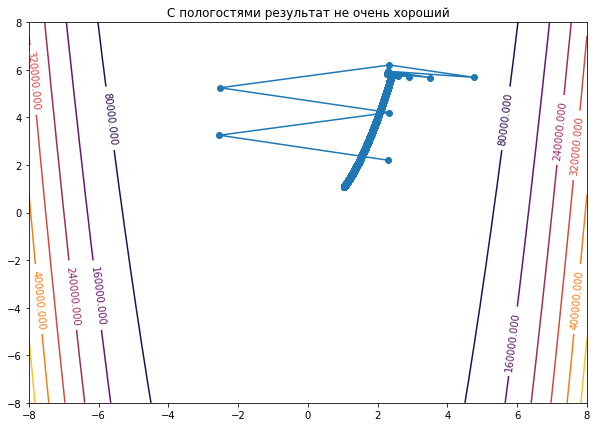

In [25]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(x_point, y_point)
plt.plot(x_point, y_point)
con = plt.contour(X, Y, Z, cmap='inferno')
plt.clabel(con)
axes = plt.gca()
plt.title('С пологостями результат не очень хороший')
axes.set_xlim([-size, size])
axes.set_ylim([-size, size])
plt.show()